# Degradation model

This example shows how the degradation model can be used.
This model describes the stochastic process of a single chemical reaction, in which the concentration of a substance degrades over time as particles react.
The substance degrades starting from an initial concentration, $n_0$, to 0 following a rate constant, $k$, according to the following model ([Erban et al., 2007](https://arxiv.org/abs/0704.1908)):
   $$A \xrightarrow{\text{k}} \emptyset$$

The model is simulated according to the Gillespie stochastic simulation algorithm (Gillespie, 1976).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pints
import pints.toy.stochastic

Specify the initial concentration, and select time points at which to record concentration values, and rate constant value (k):

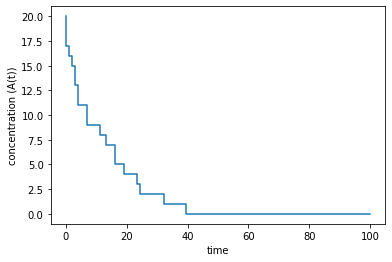

In [2]:
n_0 = 20
model = pints.toy.stochastic.DegradationModel(n_0)

times = np.linspace(0, 100, 100)
k = [0.1]

values = model.simulate(k, times)

plt.step(times, values)
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()

Given the stochastic nature of this model, every iteration returns a different result. However, averaging the concentration values at each time step, produces a reproducible result which tends towards a deterministic function as the the number of iterations tends to infinity (Erban et al., 2007): $ n_0e^{-kt} $


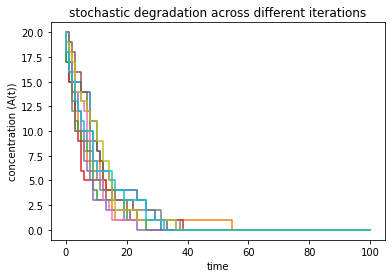

In [3]:
for i in range(10):
    values = model.simulate(k, times)
    plt.step(times, values)
    
plt.title('stochastic degradation across different iterations')
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()